In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from Configuration import Config
import json
cfg = Config()

# Set the maximum number of columns displayed to None (no limit)
pd.set_option('display.max_columns', None)

In [14]:
# Read all the folder names in the results directory

methods = os.listdir(cfg.results_loc)

print(methods)

['ForGAN-Conv-SVD', 'ForGAN-F-SVD', 'ForGAN-LSTM', 'ForGAN-LS4', 'ForGAN-SegRNN', 'ForGAN-FFT-Conv', 'ForGAN-FT-Matrix']


In [15]:
# Combine all the results into a single dataframe
all_dataframes = []
for method in methods:
    tickers = os.listdir(os.path.join(cfg.results_loc, method))
    for ticker in tickers:
        # Read the results of each ticker
        results = pd.read_csv(os.path.join(cfg.results_loc, method, ticker, 'result.csv'))

        # Remove the 'Unnamed' column if it exists
        if 'Unnamed: 0' in results.columns:
            results = results.drop('Unnamed: 0', axis=1)

        # display(results)
        # Add the dataframe to the list
        all_dataframes.append(results)

# Combine all the dataframes into a single dataframe
combined_results_df = pd.concat(all_dataframes, ignore_index=True)

# Display the combined dataframe
display(combined_results_df)

,lrd,lrg,type,epochs,ticker,hid_g,hid_d,RMSE,MAE,SR_w scaled,PnL_w,Close-to-Open SR_w,Open-to-Close SR_w,Corr,Pos mn,Neg mn,narrow dist,narrow means dist,RMSE val,MAE val,PnL_w val,SR_w scaled val,Corr val,Pos mn val,Neg mn val
0,0.00001,0.00001,ForGAN-Conv-SVD,500,EL,8,8,0.012218,0.007953,-0.180662,-0.732135,-0.270783,-0.042821,0.021735,0.161765,0.838235,False,False,0.010404,0.006531,-0.941897,-0.347197,0.025620,0.107636,0.892364
1,0.00001,0.00001,ForGAN-Conv-SVD,500,AMZN,8,8,0.019418,0.016435,-0.386901,-3.203771,-0.873782,0.182726,-0.083217,0.000000,1.000000,False,False,0.018176,0.016099,-4.323766,-0.627767,0.005847,0.000000,1.000000
2,0.00001,0.00001,ForGAN-Conv-SVD,500,AZO,8,8,0.013788,0.009761,-0.079250,-0.472957,-0.450059,0.131630,0.004329,0.011949,0.988051,False,False,0.013414,0.009213,-2.578954,-0.372154,0.095881,0.009200,0.990800
3,0.00001,0.00001,ForGAN-Conv-SVD,500,GS,8,8,0.008002,0.005302,0.139296,0.149151,0.031900,0.139589,-0.029599,0.994485,0.005515,False,False,0.006518,0.004411,-0.756740,-0.989847,-0.003964,0.998160,0.001840
4,0.00001,0.00001,ForGAN-F-SVD,500,EL,8,8,0.013353,0.008919,0.333529,2.023837,0.824447,-0.111073,-0.008881,0.795037,0.204963,False,False,0.011124,0.007508,4.664887,0.971318,0.028889,0.837167,0.162833
5,0.00001,0.00001,ForGAN-F-SVD,500,AMZN,8,8,0.010911,0.007459,0.430207,0.600915,0.096210,0.471848,0.069465,0.026654,0.973346,False,False,0.009388,0.006374,-0.556714,-0.425305,0.004128,0.011960,0.988040
6,0.00001,0.00001,ForGAN-F-SVD,500,AZO,8,8,0.014298,0.010515,0.165749,1.042408,-0.478886,0.483070,-0.000059,0.872243,0.127757,False,False,0.013834,0.009560,6.706401,1.106540,0.040353,0.899724,0.100276
7,0.00001,0.00001,ForGAN-F-SVD,500,GS,8,8,0.008144,0.005445,0.103783,0.138303,-0.314388,0.358387,0.000717,0.226103,0.773897,False,False,0.006512,0.004353,0.945135,1.021087,0.020728,0.177553,0.822447
8,0.00001,0.00001,ForGAN-LSTM,500,EL,8,8,0.011882,0.007522,0.174011,0.322857,1.034677,-0.421431,-0.045686,0.871324,0.128676,False,False,0.010064,0.006110,1.654209,1.044202,0.036783,0.912603,0.087397
9,0.00001,0.00001,ForGAN-LSTM,500,AMZN,8,8,0.010851,0.007309,-0.289136,-0.631991,-0.923716,0.316924,-0.012366,0.000000,1.000000,False,False,0.009249,0.006182,-1.137586,-0.612469,-0.014513,0.000000,1.000000


In [16]:
# Read all the json results from each ticker

cummulative_pnl = []
intraday_pnl = []
overnight_pnl = []
sample_distribution = []
means = []

for method in methods:
    tickers = os.listdir(os.path.join(cfg.results_loc, method))
    for ticker in tickers:
        # Read the results of each ticker
        with open(os.path.join(cfg.results_loc, method, ticker, 'PnLs.json')) as f:
            data = json.load(f)
            cummulative_pnl.append([method,ticker,data['cumPnL']])
            intraday_pnl.append([method,ticker,data['intradayCumPnL']])
            overnight_pnl.append([method,ticker,data['overnightCumPnL']])
            sample_distribution.append([method,ticker,data['sample_dist']])
            means.append([method,ticker,data['means']])

# Convert the lists to dataframes
cummulative_pnl_df = pd.DataFrame(cummulative_pnl, columns=['Method', 'Ticker', 'Cumulative PnL'])
intraday_pnl_df = pd.DataFrame(intraday_pnl, columns=['Method', 'Ticker', 'Intraday Cumulative PnL'])
overnight_pnl_df = pd.DataFrame(overnight_pnl, columns=['Method', 'Ticker', 'Overnight Cumulative PnL'])
sample_distribution_df = pd.DataFrame(sample_distribution, columns=['Method', 'Ticker', 'Sample Distribution'])
means_df = pd.DataFrame(means, columns=['Method', 'Ticker', 'Means'])

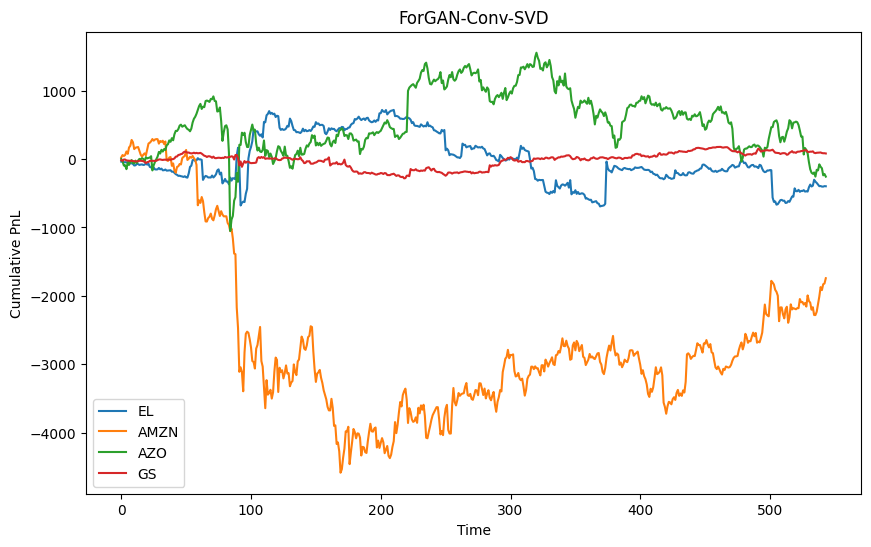

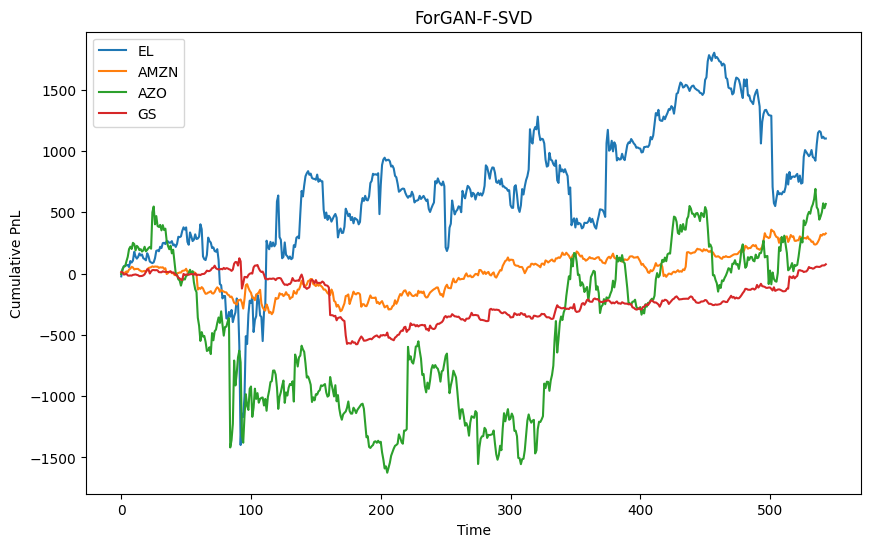

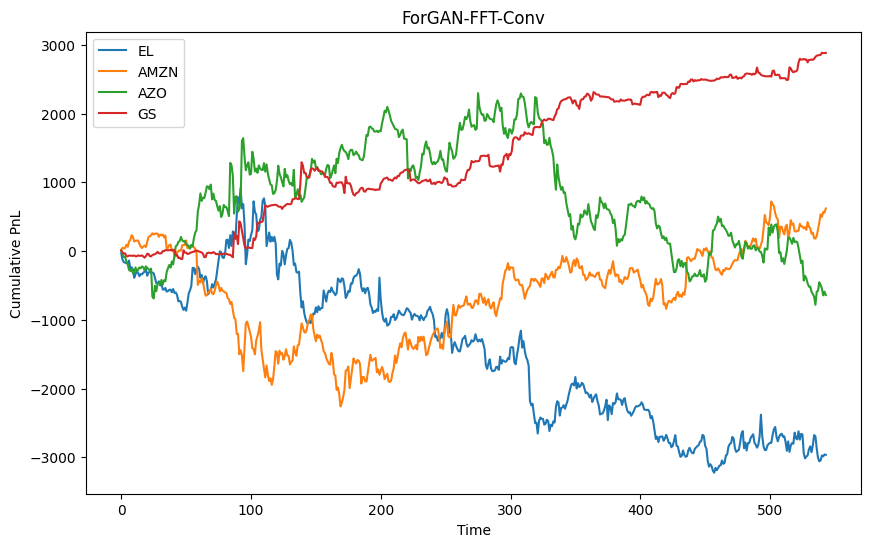

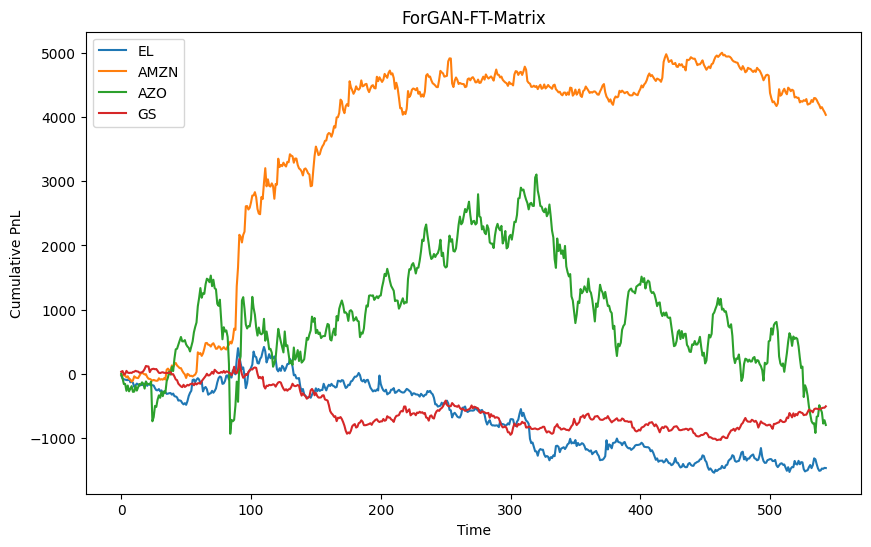

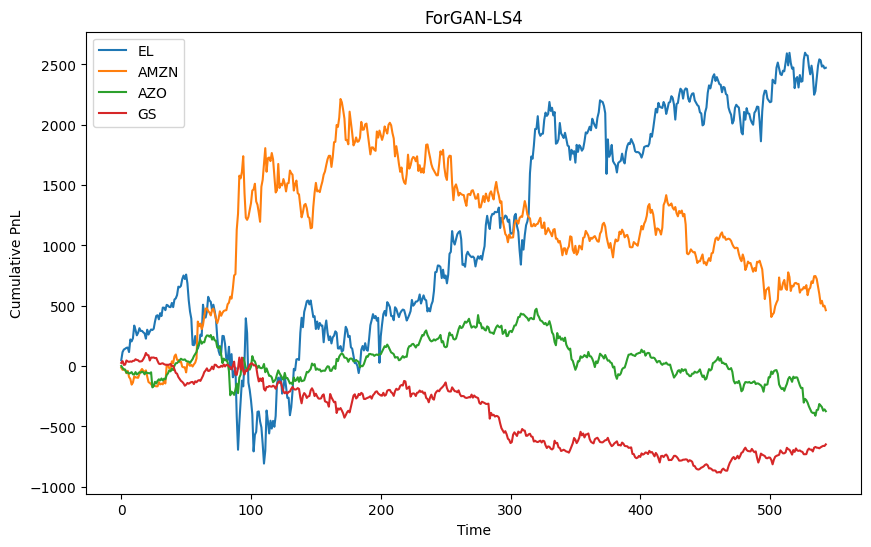

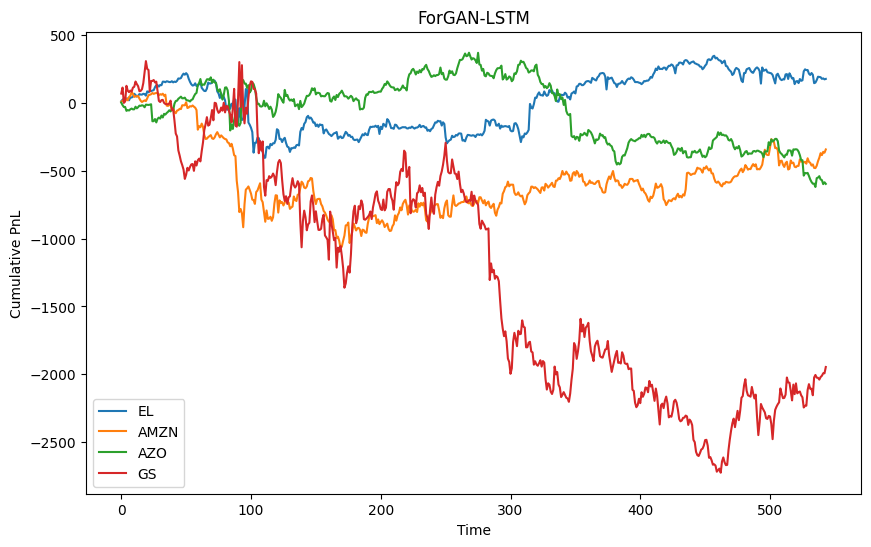

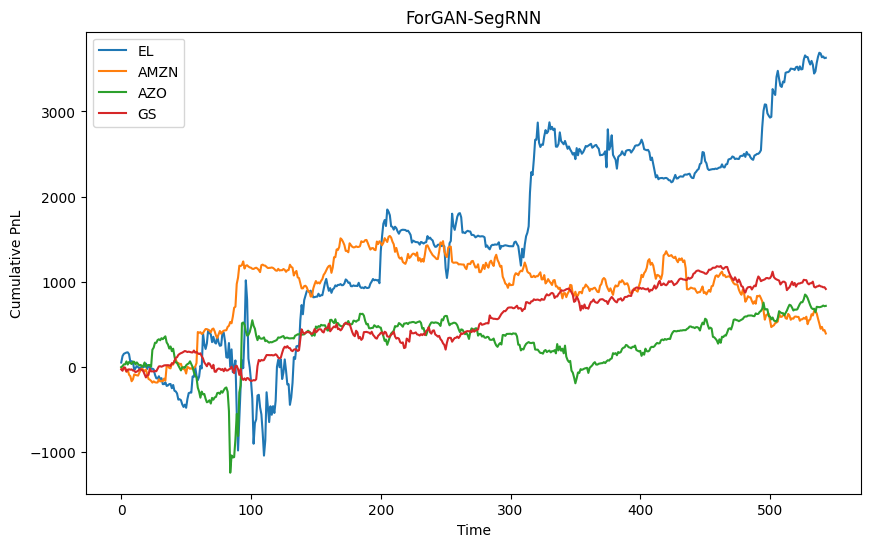

In [17]:
# Group the data by method
grouped = cummulative_pnl_df.groupby('Method')

# For each method, plot the cumulative PnL for all tickers
for name, group in grouped:
    plt.figure(figsize=(10, 6))
    for i in group.index:
        plt.plot(group.loc[i, 'Cumulative PnL'], label=group.loc[i, 'Ticker'])
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Cumulative PnL')
    plt.legend()
    plt.show() 

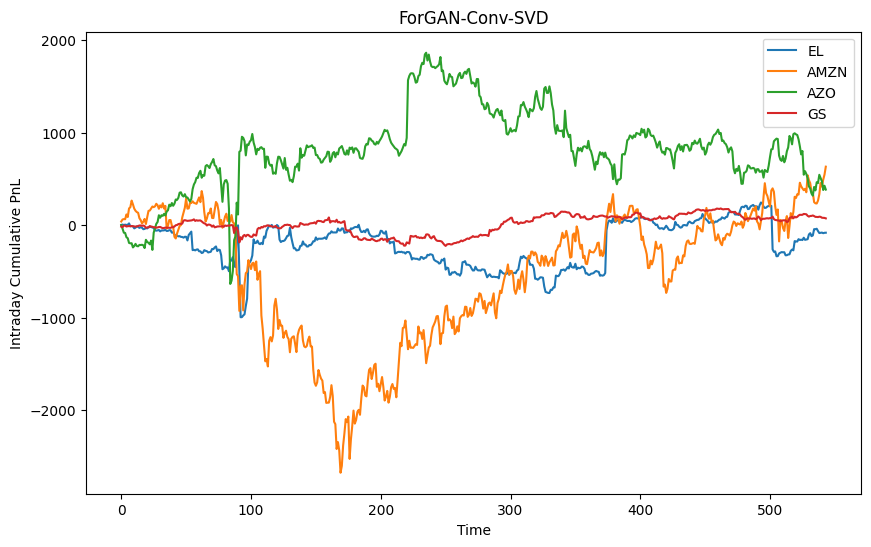

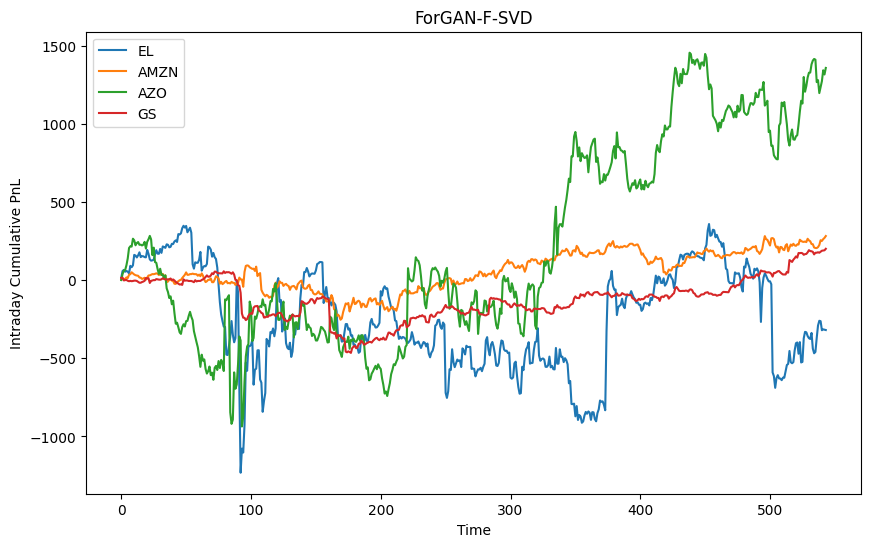

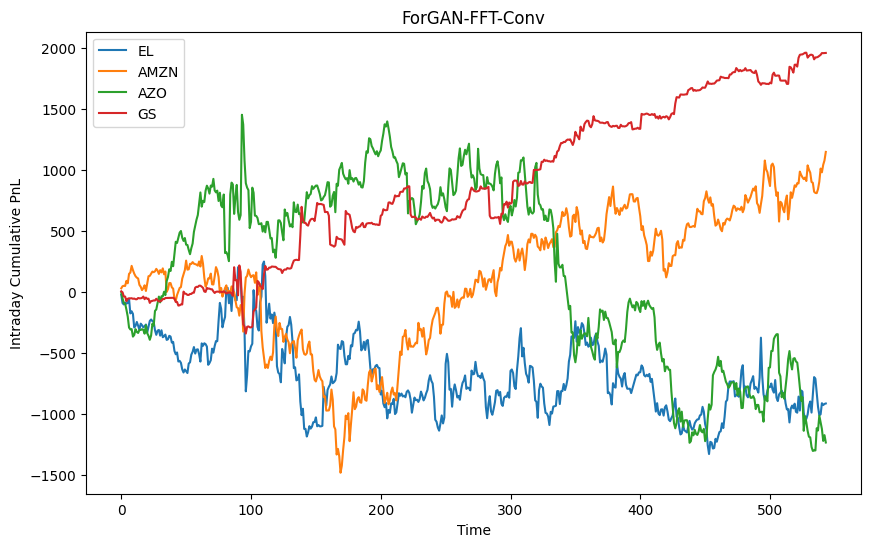

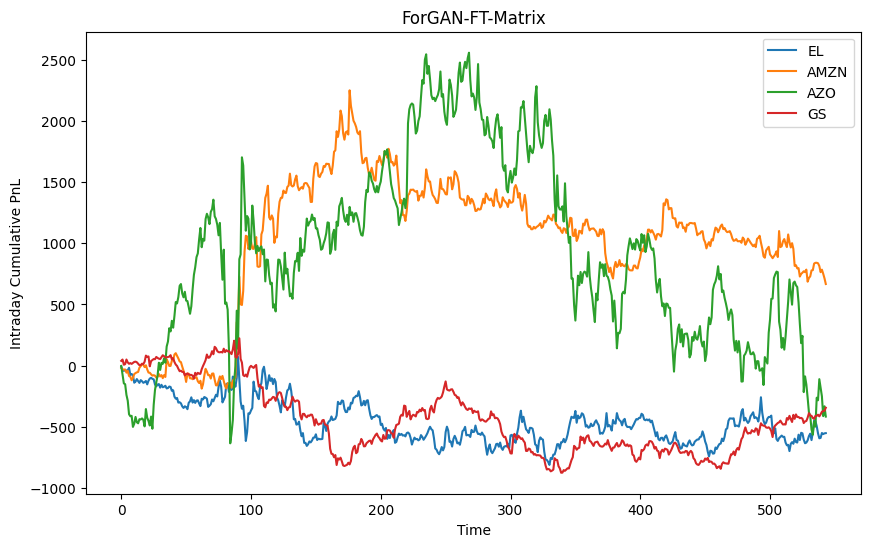

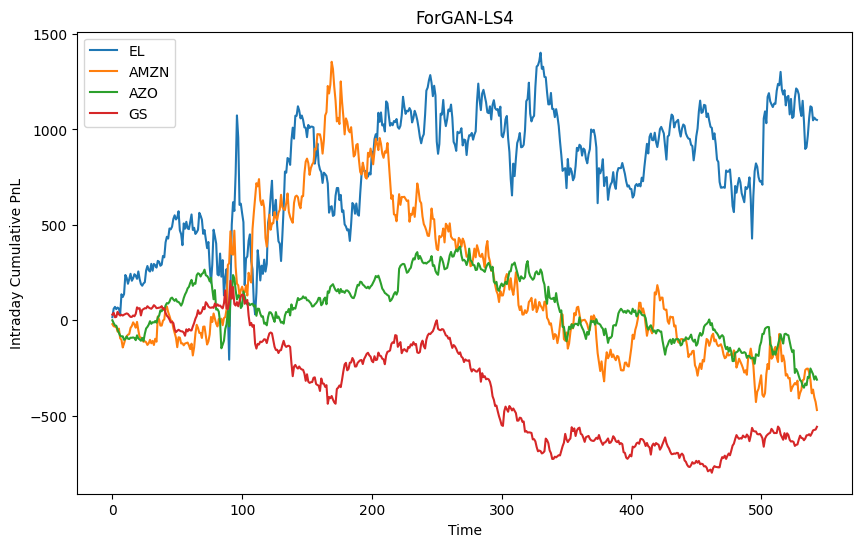

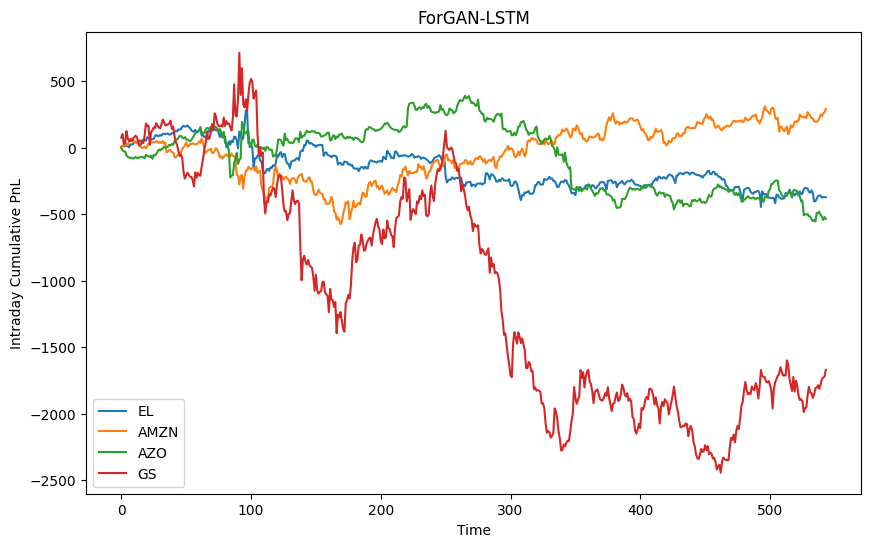

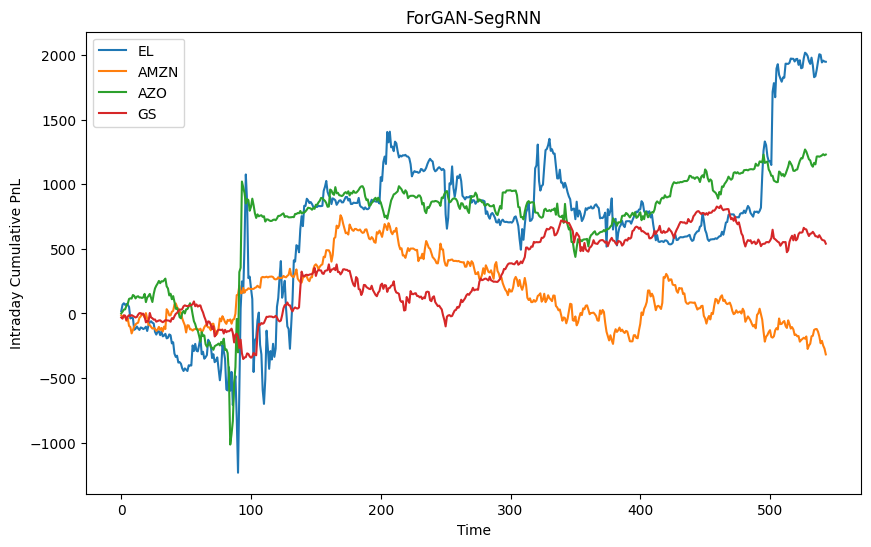

In [18]:
start_date = cfg.test_start_date

# Group the data by method
grouped = intraday_pnl_df.groupby('Method')

# For each method, plot the intraday cumulative PnL for all tickers
for name, group in grouped:
    plt.figure(figsize=(10, 6))
    for i in group.index:
        plt.plot(group.loc[i, 'Intraday Cumulative PnL'], label=group.loc[i, 'Ticker'])
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Intraday Cumulative PnL')
    plt.legend()
    plt.show()

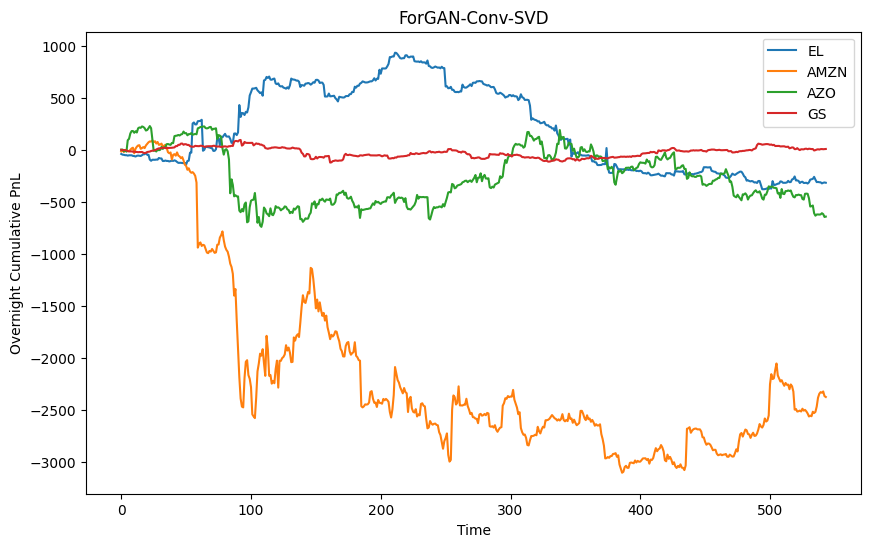

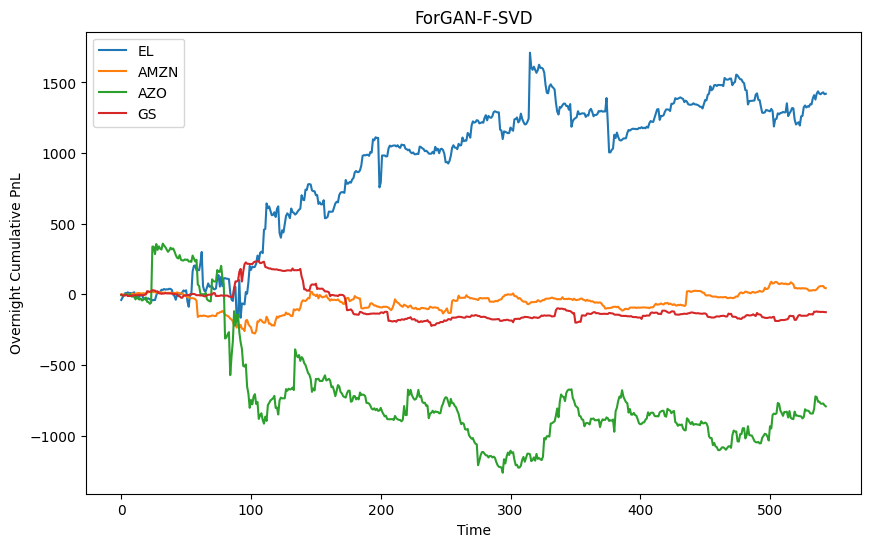

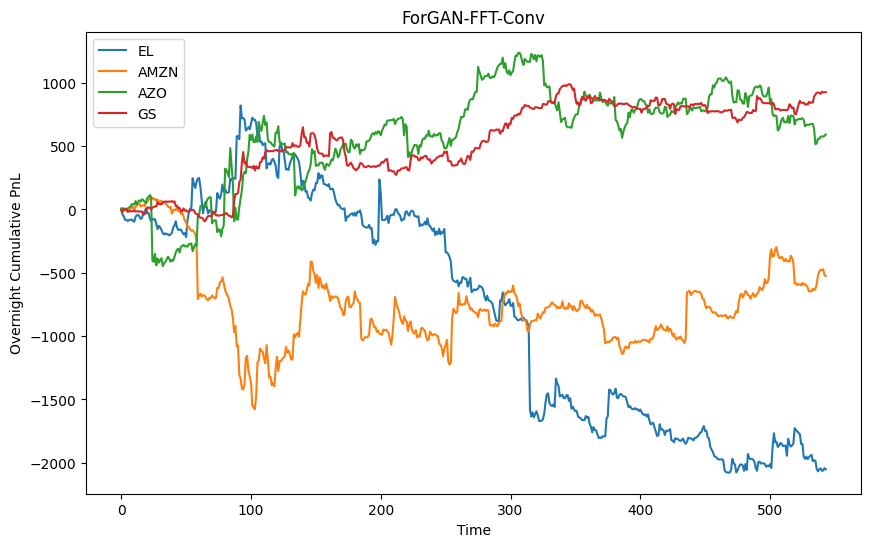

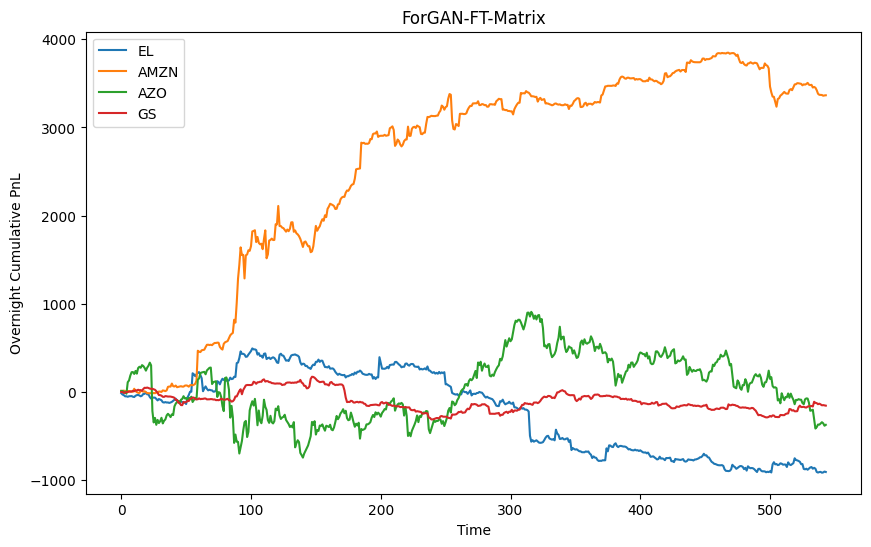

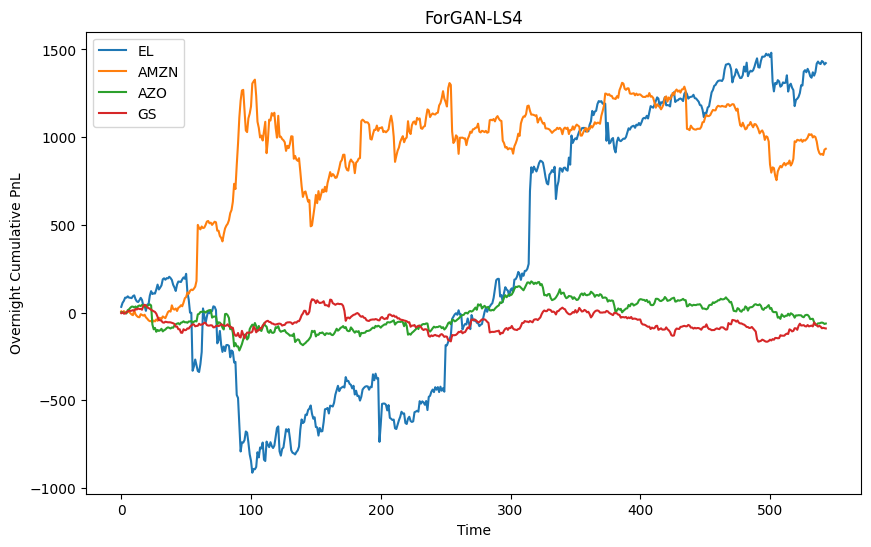

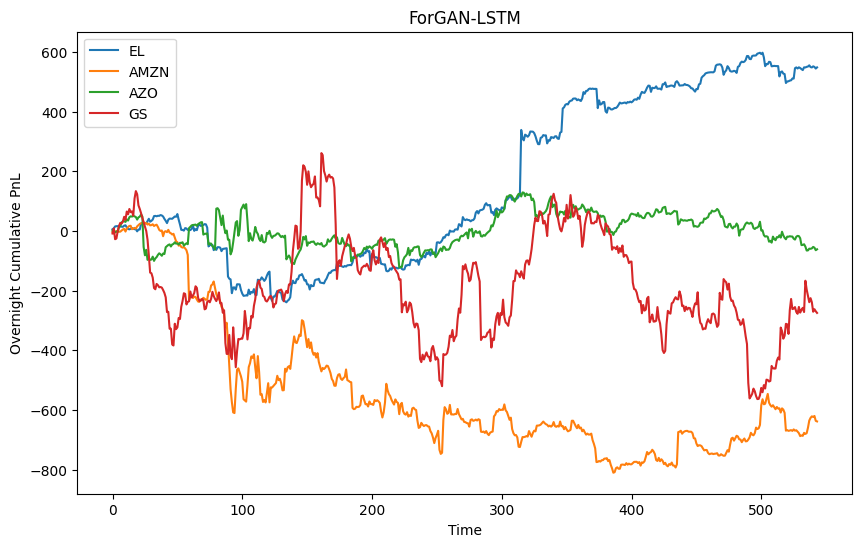

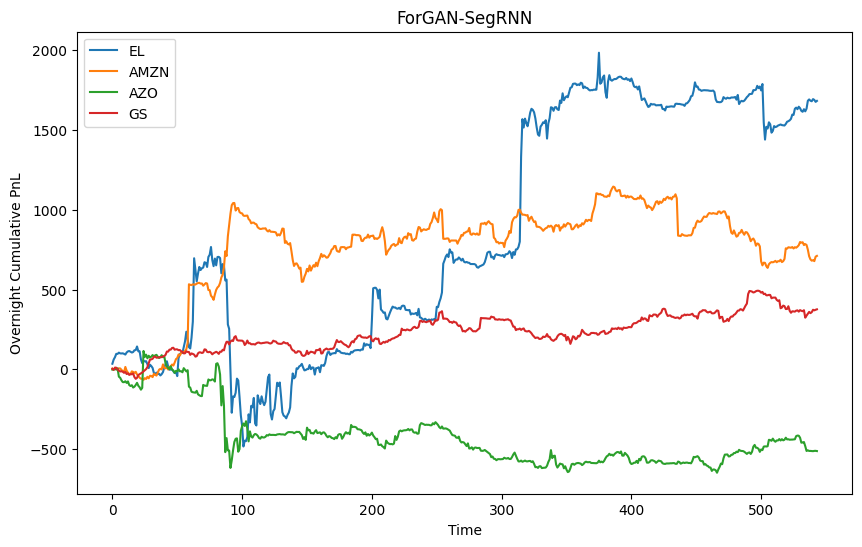

In [19]:

# Group the data by method
grouped = overnight_pnl_df.groupby('Method')

# For each method, plot the overnight cumulative PnL for all tickers
for name, group in grouped:
    plt.figure(figsize=(10, 6))
    for i in group.index:
        plt.plot(group.loc[i, 'Overnight Cumulative PnL'], label=group.loc[i, 'Ticker'])
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Overnight Cumulative PnL')
    plt.legend()
    plt.show()

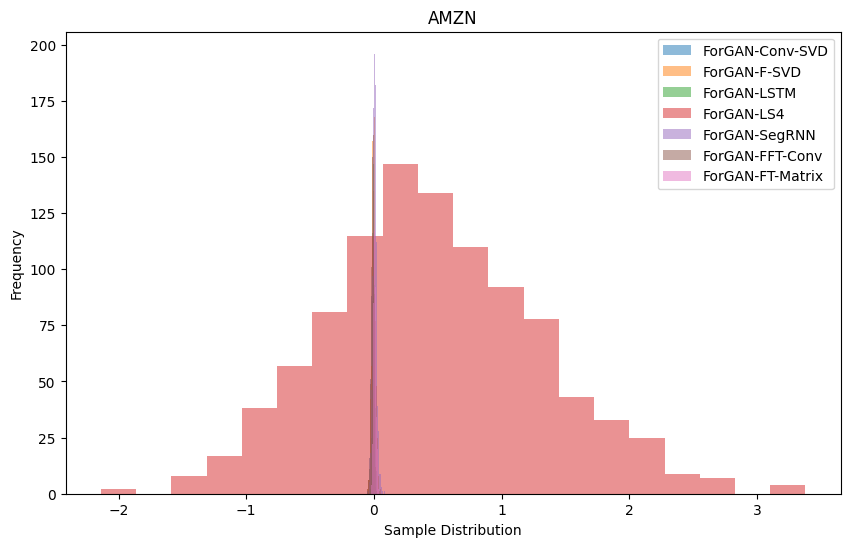

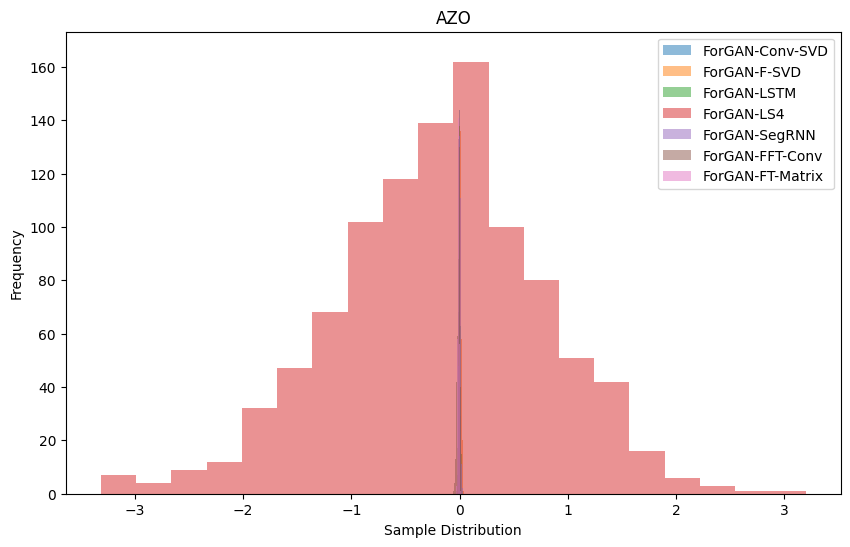

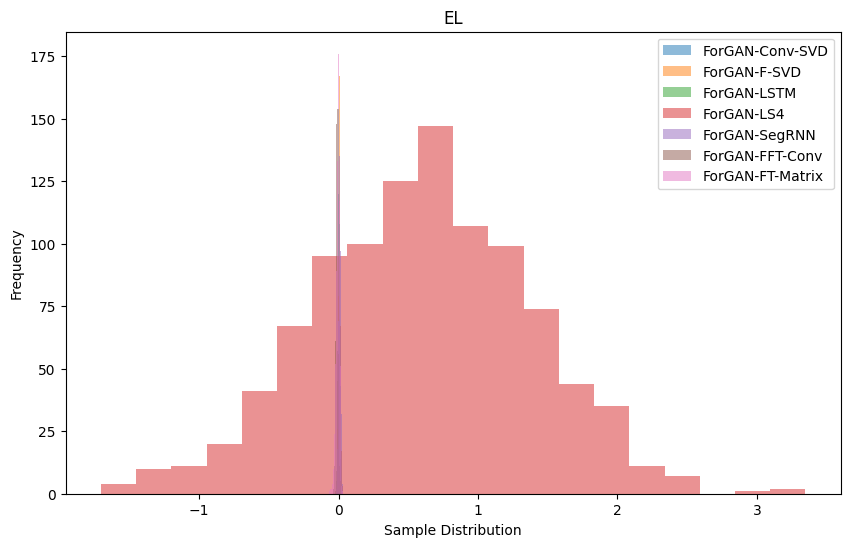

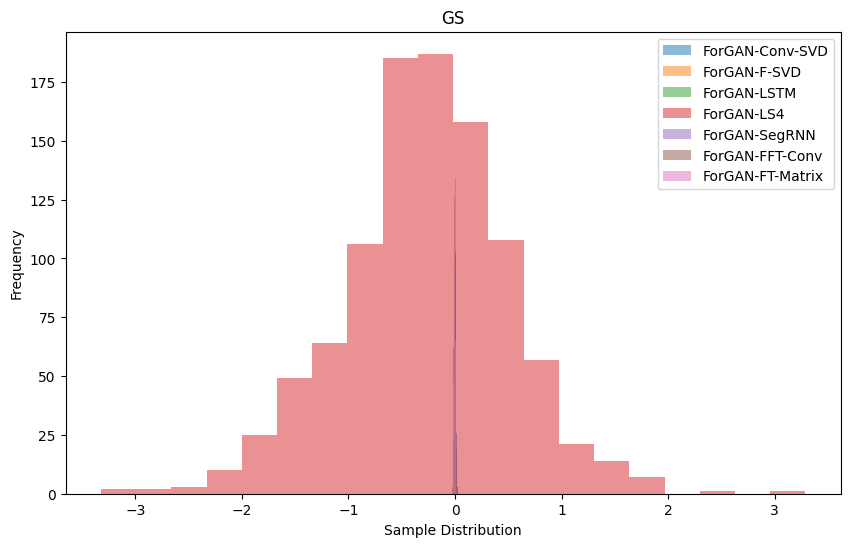

In [20]:
# Group the data by ticker
grouped = sample_distribution_df.groupby('Ticker')

# For each ticker, plot the sample distribution for all methods
for name, group in grouped:
    plt.figure(figsize=(10, 6))
    for i in group.index:
        plt.hist(group.loc[i, 'Sample Distribution'], label=group.loc[i, 'Method'], alpha=0.5, bins=20)
    plt.title(name)
    plt.xlabel('Sample Distribution')
    plt.ylabel('Frequency')
    plt.legend() 
    plt.show()